In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Specify the file path
file_path = "../data/raw/g_patent.tsv"

# Read the TSV file into a DataFrame
df = pd.read_csv(file_path, sep='\t')

# Display the DataFrame
df

C:\Users\HP\AppData\Local\Temp\ipykernel_18844\2165177947.py:5: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t')


,patent_id,patent_type,patent_date,patent_title,patent_abstract,wipo_kind,num_claims,withdrawn,filename
0,10000000,utility,2018-06-19,Coherent LADAR using intra-pixel quadrature de...,A frequency modulated (coherent) laser detecti...,B2,20,0,ipg180619.xml
1,10000001,utility,2018-06-19,Injection molding machine and mold thickness c...,The injection molding machine includes a fixed...,B2,12,0,ipg180619.xml
2,10000002,utility,2018-06-19,Method for manufacturing polymer film and co-e...,The present invention relates to: a method for...,B2,9,0,ipg180619.xml
3,10000003,utility,2018-06-19,Method for producing a container from a thermo...,The invention relates to a method for producin...,B2,18,0,ipg180619.xml
4,10000004,utility,2018-06-19,"Process of obtaining a double-oriented film, c...",The present invention relates to provides a do...,B2,6,0,ipg180619.xml
...,...,...,...,...,...,...,...,...,...
8701564,T998013,defensive publication,1980-09-02,Protection of insect pheromones from degradati...,NaN,I4,1,0,pftaps19800902_wk36.zip
8701565,T998014,defensive publication,1980-09-02,"Thiazolyl couplers, coupler compositions and p...",NaN,I4,3,0,pftaps19800902_wk36.zip
8701566,T999001,defensive publication,1980-10-07,Sack handling device,NaN,I4,1,0,pftaps19801007_wk41.zip
8701567,T999002,defensive publication,1980-10-07,Application of polymeric powders to a substrate,NaN,I4,7,0,pftaps19801007_wk41.zip


In [3]:
patent_types = df['patent_type'].unique()

patent_types

array(['utility', 'reissue', 'design', 'TVPP', 'plant',
       'statutory invention registration', 'defensive publication'],
      dtype=object)

In [4]:
df.dtypes

patent_id          object
patent_type        object
patent_date        object
patent_title       object
patent_abstract    object
wipo_kind          object
num_claims          int64
withdrawn           int64
filename           object
dtype: object

In [5]:
df['patent_date'] = pd.to_datetime(df['patent_date'])

In [6]:
df.dtypes

patent_id                  object
patent_type                object
patent_date        datetime64[ns]
patent_title               object
patent_abstract            object
wipo_kind                  object
num_claims                  int64
withdrawn                   int64
filename                   object
dtype: object

In [7]:
yearly_counts = df.groupby(df['patent_date'].dt.year).size()

# Calculate the cumulative count
cumulative_counts = yearly_counts.cumsum()

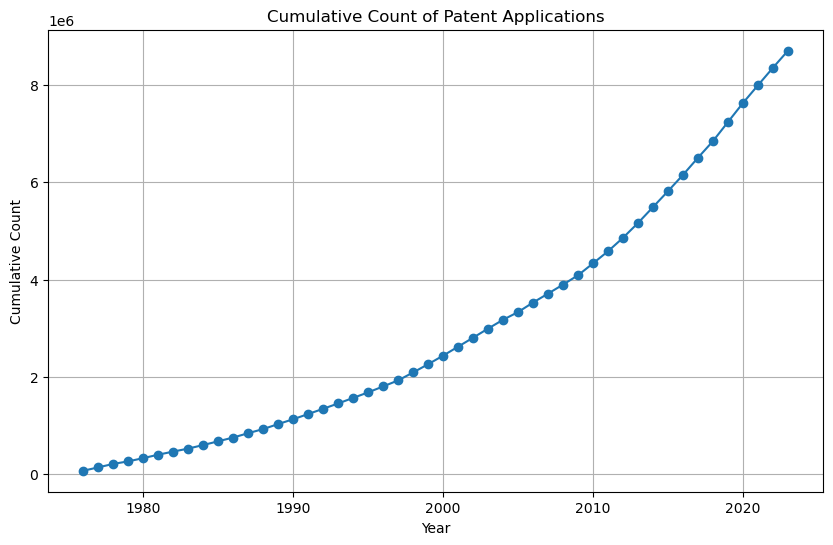

In [8]:
# Plotting the S-curve
plt.figure(figsize=(10, 6))
plt.plot(cumulative_counts.index, cumulative_counts.values, marker='o', linestyle='-')
plt.title('Cumulative Count of Patent Applications')
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.grid(True)
plt.show()

# Keywords Matchings

AI, Aviation, Laser, Composite, Space

In [34]:
keywords = ['artificial intelligence', 'aviation', 'space', 'laser', 'composite']

filter_condition = '|'.join(keywords)
filtered_df = df[df['patent_title'].str.contains(filter_condition, case=False)]

In [22]:
filtered_df

,patent_id,patent_type,patent_date,patent_title,patent_abstract,wipo_kind,num_claims,withdrawn,filename,Time,Week
23,10000025,utility,2018-06-19,Optimized cross-ply orientation in composite l...,A composite laminate has a primary axis of loa...,B2,9,0,ipg180619.xml,2018-06,2018-06-18/2018-06-24
24,10000026,utility,2018-06-19,Composite induction consolidation apparatus an...,A composite induction consolidation apparatus ...,B2,18,0,ipg180619.xml,2018-06,2018-06-18/2018-06-24
34,10000036,utility,2018-06-19,High kinetic energy penetrator shielding and h...,"Boron nitride nanotubes (BNNTs), boron nitride...",B2,20,0,ipg180619.xml,2018-06,2018-06-18/2018-06-24
48,10000050,utility,2018-06-19,Method for the manufacture of a fibre composit...,A method for the manufacture of a fiber compos...,B2,3,0,ipg180619.xml,2018-06,2018-06-18/2018-06-24
296,10000300,utility,2018-06-19,Device for holding and aligning a useful compo...,A device for holding and aligning a component ...,B2,14,0,ipg180619.xml,2018-06,2018-06-18/2018-06-24
...,...,...,...,...,...,...,...,...,...,...,...
8701131,T102103,defensive publication,1982-08-03,Surge arrester insulating spacer device,NaN,I4,8,0,pftaps19820803_wk31.zip,1982-08,1982-08-02/1982-08-08
8701282,T958004,defensive publication,1977-05-03,"Hot-melt adhesive, and wood composite structur...",NaN,I4,6,0,pftaps19770503_wk18.zip,1977-05,1977-05-02/1977-05-08
8701361,T967003,defensive publication,1978-02-07,Flooring of wood-plastic composite,NaN,I4,1,0,pftaps19780207_wk06.zip,1978-02,1978-02-06/1978-02-12
8701367,T967009,defensive publication,1978-02-07,Method of applying a wear-resistant composite ...,NaN,I4,5,0,pftaps19780207_wk06.zip,1978-02,1978-02-06/1978-02-12


In [35]:
# Save filtered DataFrame to a CSV file
filtered_df.to_csv('filtered_g_patent.csv', index=False)

In [23]:
yearly_counts_specified = filtered_df.groupby(filtered_df['patent_date'].dt.year).size()

# Calculate the cumulative count
cumulative_counts_specified = yearly_counts_specified.cumsum()

cumulative_counts_specified

patent_date
1976       762
1977      1420
1978      2077
1979      2618
1980      3336
1981      4102
1982      4874
1983      5596
1984      6485
1985      7444
1986      8492
1987      9903
1988     11383
1989     13212
1990     14941
1991     16779
1992     18744
1993     20735
1994     22841
1995     24753
1996     26754
1997     28751
1998     31469
1999     34176
2000     37005
2001     39850
2002     42665
2003     45847
2004     48980
2005     51423
2006     54162
2007     56487
2008     58845
2009     61492
2010     64826
2011     68156
2012     71650
2013     75504
2014     79621
2015     83917
2016     88247
2017     92887
2018     97555
2019    103515
2020    109791
2021    115997
2022    122842
2023    130085
dtype: int64

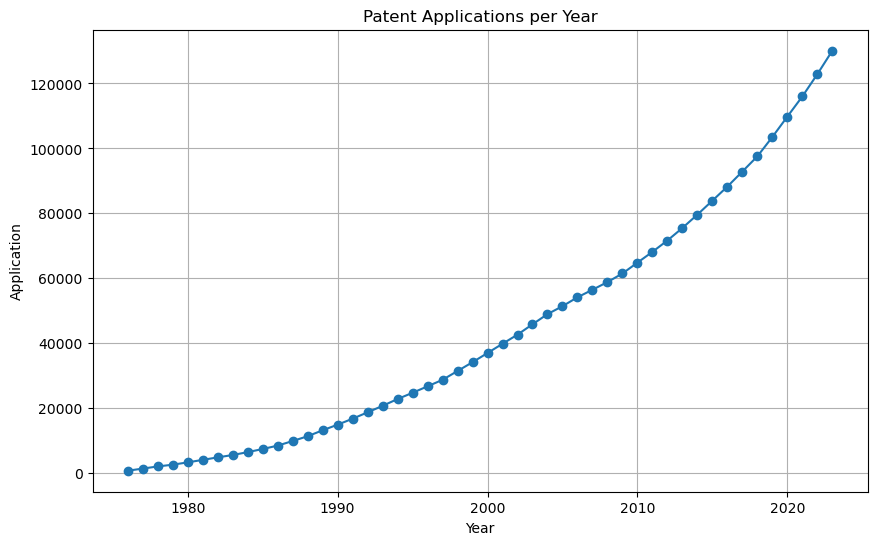

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_counts_specified.index, cumulative_counts_specified.values, marker='o', linestyle='-')
plt.title('Patent Applications per Year')
plt.xlabel('Year')
plt.ylabel('Application')
plt.grid(True)
plt.show()

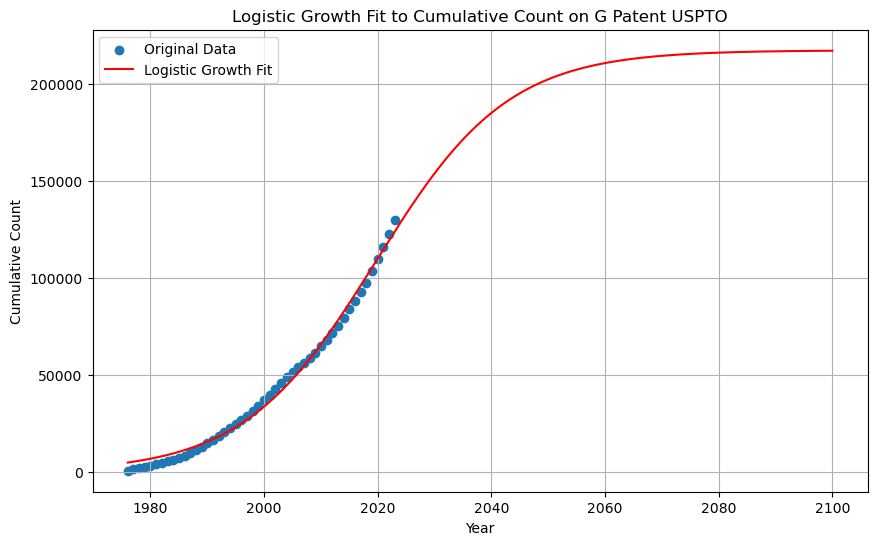

Estimated parameters:
L (Carrying Capacity): 217414.1191512922
k (Growth Rate): 0.08596335748720108
x0 (Inflection Point): 2019.681336489105


In [25]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Convert cumulative counts to numpy arrays
x_data = np.array(cumulative_counts_specified.index)
y_data = np.array(cumulative_counts_specified.values)

# Define the logistic growth function
def logistic_growth(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Initial guess for the parameters
initial_guess = (max(y_data), 0.1, np.mean(x_data))

# Fit the curve to the data
params, covariance = curve_fit(logistic_growth, x_data, y_data, p0=initial_guess)

# Extract the parameters
L, k, x0 = params

# Generate points for the fitted curve
x_fit = np.linspace(min(x_data), 2100, 1000)
y_fit = logistic_growth(x_fit, L, k, x0)

# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_fit, y_fit, 'r-', label='Logistic Growth Fit')
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.title('Logistic Growth Fit to Cumulative Count on G Patent USPTO')
plt.legend()
plt.grid(True)
plt.show()

print("Estimated parameters:")
print("L (Carrying Capacity):", L)
print("k (Growth Rate):", k)
print("x0 (Inflection Point):", x0)

## Aggregate per Month

In [26]:
data_path = '../data/processed/'

In [27]:
def calculate_application_per_month(data: pd.DataFrame):
    """
    Calculate the cumulative count of patent applications per month.

    Parameters:
    - data: DataFrame containing the patent application data

    Returns:
    - DataFrame with the cumulative count of patent applications per month
    """
  
    data['patent_date'] = pd.to_datetime(data['patent_date'])

    data['Time'] = data['patent_date'].dt.to_period('M')

    # Group by year and month, and count the number of applications in each group
    applications_per_month = data.groupby('Time').size().reset_index(name='Applications')
    # applications_per_month['Cumulative_Count'] = applications_per_month['Applications_Per_Month'].cumsum()
    
    return applications_per_month

In [28]:
series = calculate_application_per_month(df)

series

,Time,Applications
0,1976-01,5352
1,1976-02,5231
2,1976-03,7123
3,1976-04,6032
4,1976-05,5969
...,...,...
571,2023-08,35970
572,2023-09,29219
573,2023-10,38048
574,2023-11,29296


## Aggregate per Week

In [29]:
def calculate_application_per_week(data: pd.DataFrame, date_column: str):
    """
    Calculate the cumulative count of patent applications per week.

    Parameters:
    - data: DataFrame containing the patent application data
    - date_column: Name of the column containing the date information

    Returns:
    - DataFrame with the cumulative count of patent applications per week
    """
    # Convert date column to datetime format
    data[date_column] = pd.to_datetime(data[date_column])

    # Extract year and week number from the date
    data['Week'] = data[date_column].dt.to_period('W')

    # Group by week and count the number of applications in each group
    applications_per_week = data.groupby('Week').size().reset_index(name='Applications')

    return applications_per_week

In [30]:
df.dtypes

patent_id                  object
patent_type                object
patent_date        datetime64[ns]
patent_title               object
patent_abstract            object
wipo_kind                  object
num_claims                  int64
withdrawn                   int64
filename                   object
Time                    period[M]
Week                period[W-SUN]
dtype: object

In [31]:
week_ts = calculate_application_per_week(df, date_column='patent_date')

week_ts

,Week,Applications
0,1976-01-05/1976-01-11,1379
1,1976-01-12/1976-01-18,1257
2,1976-01-19/1976-01-25,1384
3,1976-01-26/1976-02-01,1332
4,1976-02-02/1976-02-08,1298
...,...,...
2499,2023-11-27/2023-12-03,7385
2500,2023-12-04/2023-12-10,7316
2501,2023-12-11/2023-12-17,5819
2502,2023-12-18/2023-12-24,6124


In [32]:
week_ts.to_csv(path_or_buf=data_path+'applications_per_week.csv', index=True)